In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(1850,1950)]
i =0
result = np.zeros((100,800))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/HISTice/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.cice.h.'+yy+'-'+mm +'.aice.nc')
        plotvar = data.variables['aice'][0,:,:]
        plotvar = plotvar[224:343,600:1400]
        aveplot = np.nanmean(plotvar,axis=0)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
A = np.arange(100)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)

In [5]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'spacing'
  import sys


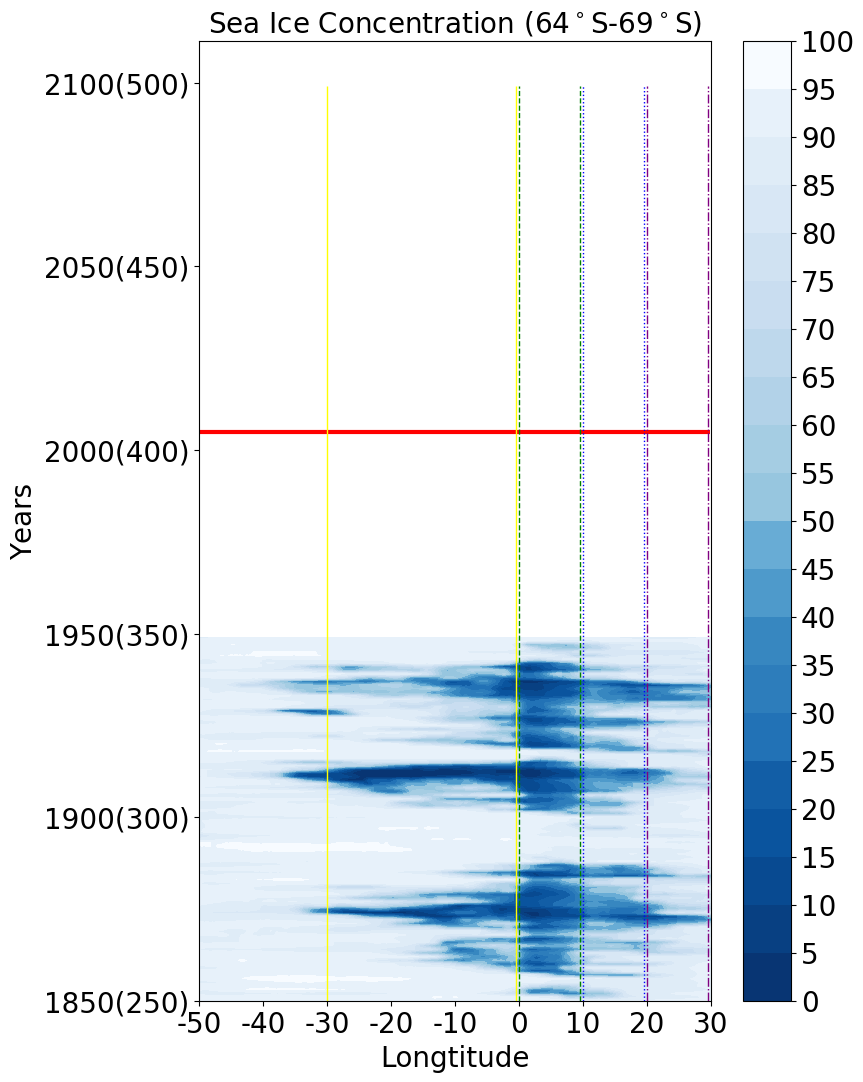

In [7]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)

im.cmap.set_over('white')
#im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")
plt.hlines(155, 0, 799, colors = "red",linestyles = "solid",linewidth=3)
plt.vlines(200, 0, 249, colors = "yellow",linestyles = "solid",linewidth=1)
plt.vlines(495, 0, 249, colors = "yellow",linestyles = "solid",linewidth=1)


plt.vlines(500, 0, 249, colors = "green",linestyles = "dashed",linewidth=1)
plt.vlines(595, 0, 249, colors = "green",linestyles = "dashed",linewidth=1)

plt.vlines(600, 0, 249, colors = "blue",linestyles = "dotted",linewidth=1)
plt.vlines(695, 0, 249, colors = "blue",linestyles = "dotted",linewidth=1)


plt.vlines(700, 0, 249, colors = "purple",linestyles = 'dashdot',linewidth=1)
plt.vlines(795, 0, 249, colors = "purple",linestyles = "dashdot",linewidth=1)
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(0,801,100), ['-50','-40','-30','-20','-10', '0', '10', '20','30'],**my_font)
plt.yticks(range(0,251,50), ['1850(250)', '1900(300)','1950(350)', '2000(400)','2050(450)','2100(500)'],**my_font)
#plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Sea Ice Concentration (64$^\circ$S-69$^\circ$S)',**my_font)
plt.savefig("HHH2.png",bbox_inches='tight',dpi=fig.dpi)